# Импортирование библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Загрузка датасета и EDA

In [4]:
df = pd.read_csv('Titanic.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Визуализация распределения признаков

Зададим цветовую палитру

In [ ]:
sns.set(style="whitegrid")
colors=['#3A1078', '#3795BD', '#D7C0AE']

palette={1: colors[0], 0: colors[1]}

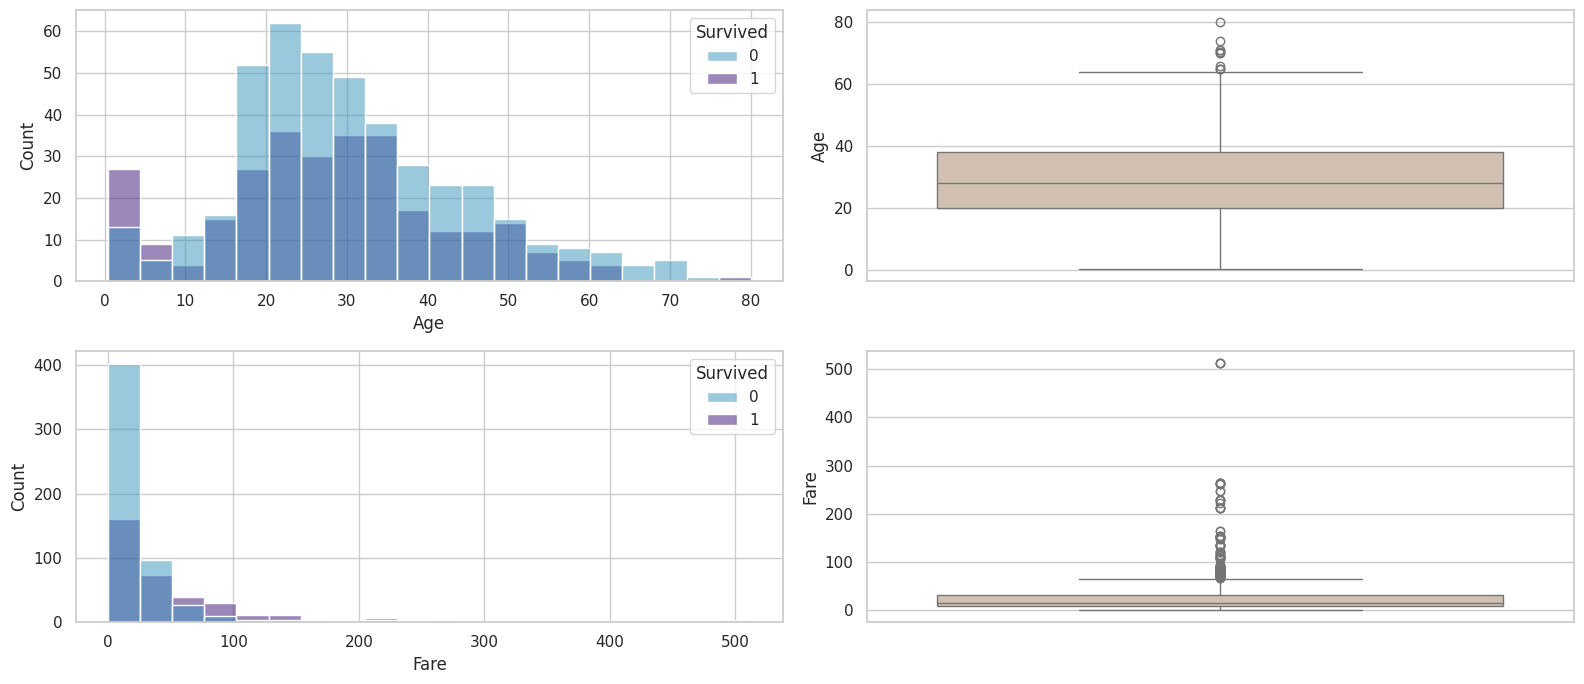

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.histplot(data=df,
            x='Age',
            bins = 20, hue ='Survived',
             palette=palette,);
plt.subplot(2,2,2)
sns.boxplot(df['Age'],color=colors[2])

plt.subplot(2,2,3)
sns.histplot(data=df,
            x='Fare',
            bins = 20, hue ='Survived',
             palette=palette,);
plt.subplot(2,2,4)
sns.boxplot(df['Fare'],color=colors[2])

plt.tight_layout()
plt.show()

### 1. Графики распределения возраста:
- **Гистограмма возраста** показывает, что молодые пассажиры (особенно в возрасте до 30 лет) составляли большую часть выборки. Среди них есть как выжившие, так и погибшие, однако процент выживших кажется выше среди детей и подростков, что может свидетельствовать о приоритете спасения детей.
- **Boxplot возраста** подтверждает, что медианный возраст пассажиров находится примерно между 20 и 30 годами. Также наблюдаются выбросы среди пожилых пассажиров (в возрасте 60 лет и старше). Выжившие распределены преимущественно среди более молодых групп, в то время как пожилые пассажиры имеют меньший шанс на выживание.

### 2. Графики распределения стоимости билета (Fare):
- **Гистограмма стоимости билета** демонстрирует, что большинство пассажиров имели билеты с низкой стоимостью (ниже 100 единиц). Среди пассажиров с более высокими значениями Fare (от 100 и выше) выживаемость выше, что может указывать на корреляцию между классом обслуживания и шансами на спасение.
- **Boxplot стоимости билета** показывает значительное количество выбросов среди высоких значений. Это указывает на то, что некоторые пассажиры купили дорогие билеты, что может быть связано с более высоким классом обслуживания и, как следствие, с большей вероятностью выживания.

### Заключение:
- Молодой возраст и высокая стоимость билета положительно коррелируют с выживаемостью. Вероятно, дети и пассажиры в более высоком классе имели преимущество при спасении.
- Пожилые пассажиры и пассажиры с дешевыми билетами имели меньший шанс на выживание, что может указывать на социальные или экономические приоритеты при эвакуации.

Эти наблюдения согласуются с историческими данными о крушении, когда дети и пассажиры первого класса имели больше шансов на выживание.

Посмотрим в логарифмическом масштабе

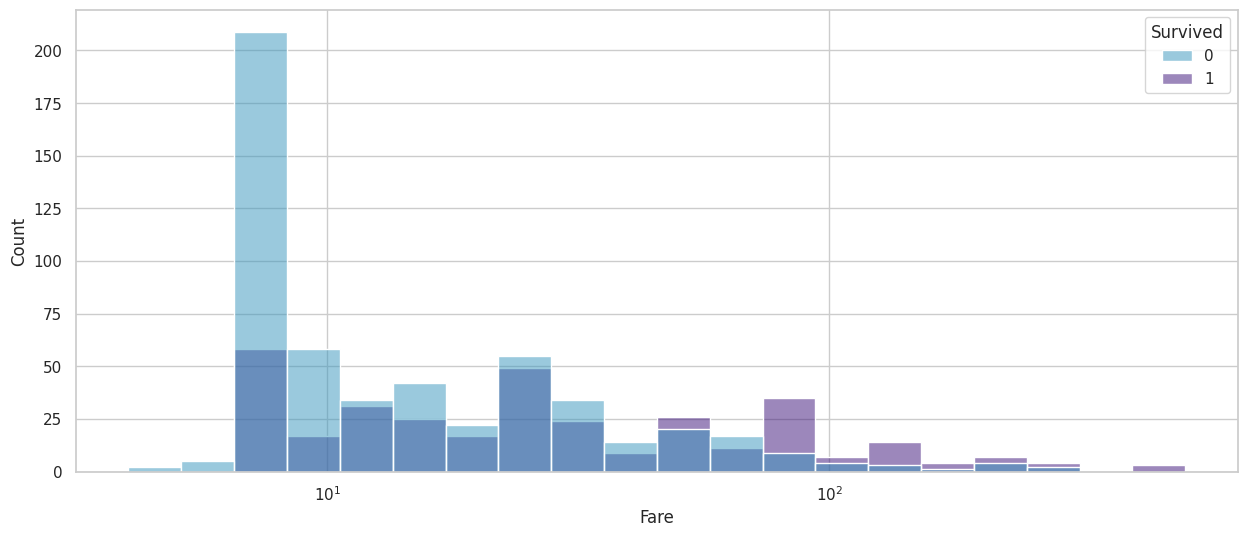

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,
             x='Fare',
             bins = 20,
             log_scale = True, hue ='Survived',
             palette=palette,);

Удалим, все что больше 100 и меньше 2

In [ ]:
question_fare = df[(df['Fare'] >= 100) | (df['Fare'] <= 2)]
df = df.drop(question_fare.index)
df = df.reset_index(drop=True)

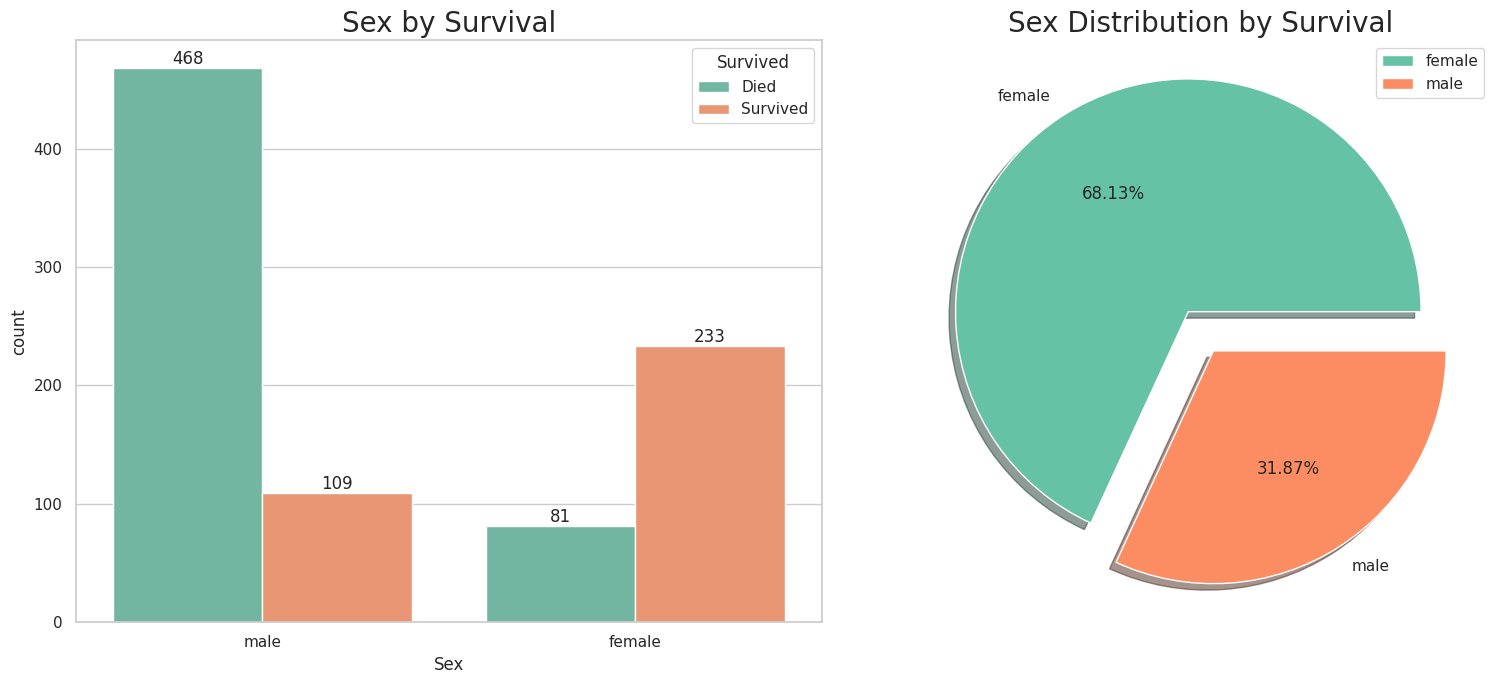

In [ ]:
palette_1 = sns.color_palette("Set2")
plt.figure(figsize=(16, 7))

ax = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=df, palette=palette_1, ax=ax)
ax.bar_label(ax.containers[0])
if len(ax.containers) > 1:
    ax.bar_label(ax.containers[1])
plt.legend(('Died', 'Survived'), title="Survived")
plt.title("Sex by Survival", fontsize=20)

ax = plt.subplot(1, 2, 2)
sex_survived_counts = df.groupby(['Sex', 'Survived']).size().unstack()
sex_survived_counts.plot(kind='pie', y=1, explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, ax=ax, colors=palette_1)
ax.set_ylabel('')
ax.set_title("Sex Distribution by Survival", fontsize=20)

plt.tight_layout()
plt.show()

### График 1: Распределение выживаемости по полу (Sex by Survival)
- Среди мужчин выживаемость значительно ниже: из 577 мужчин только 109 выжили, а 468 погибли. Это указывает на то, что мужчины имели гораздо меньшие шансы на спасение.
- Среди женщин, напротив, наблюдается более высокая выживаемость: из 314 женщин 233 выжили и только 81 погибла. Это может указывать на то, что в спасательных приоритетах женщины имели преимущество.

### График 2: Половое распределение выживших (Sex Distribution by Survival)
- Среди выживших наибольшую долю составляют женщины (68.13%), в то время как мужчины составляют только 31.87% от общего числа выживших. Это подтверждает предыдущий вывод о том, что женщины имели значительно более высокий шанс на выживание по сравнению с мужчинами.
  
### Заключение:
Из этих графиков можно сделать вывод, что пол сильно влияет на вероятность выживания. Женщины выживали чаще мужчин, что соответствует историческим данным, согласно которым приоритет при спасении отдавался женщинам и детям. Это может свидетельствовать о культурных и социальных нормах того времени, когда в чрезвычайных ситуациях спасение женщин и детей ставилось выше.

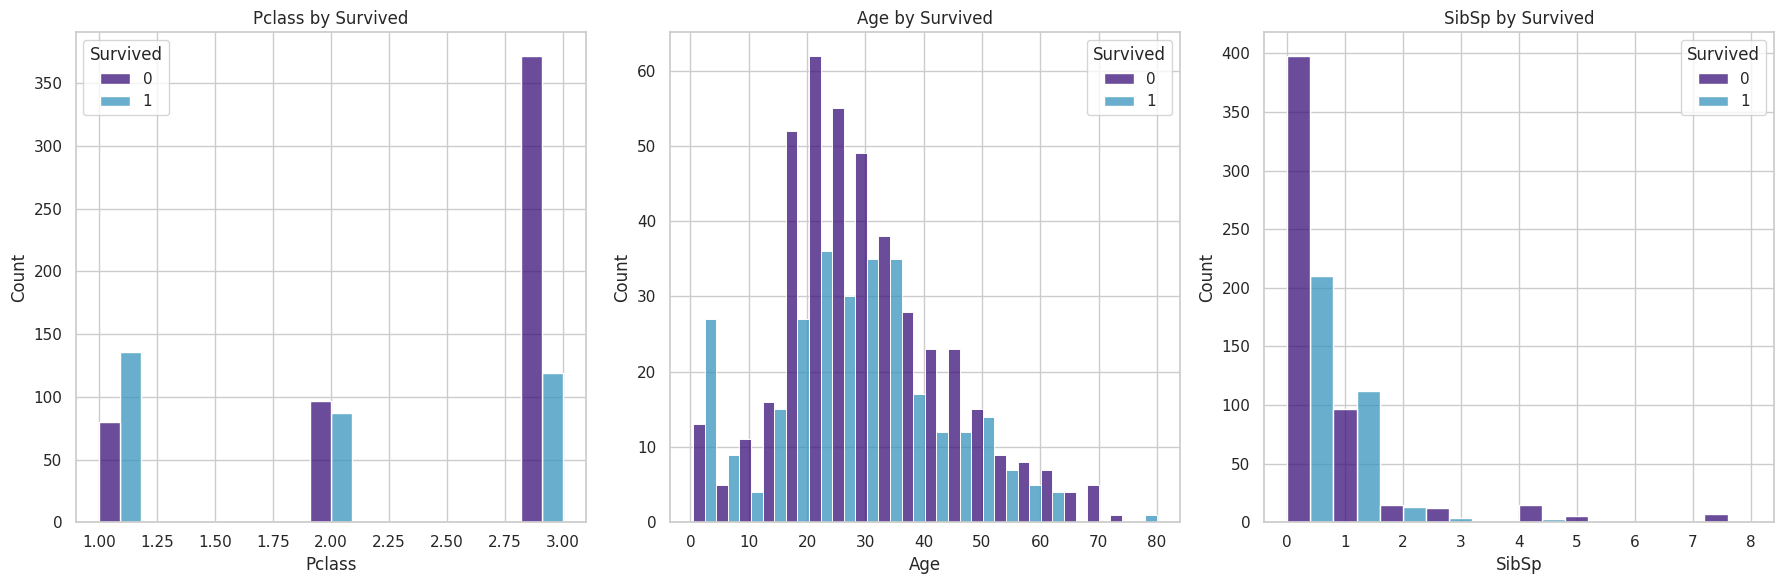

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.histplot(data=df, x='Pclass', hue='Survived', multiple='dodge', palette=colors[:2], ax=axes[0])
axes[0].set_title('Pclass by Survived')

sns.histplot(data=df, x='Age', hue='Survived', bins=20, multiple='dodge', palette=colors[:2], ax=axes[1])
axes[1].set_title('Age by Survived')

sns.histplot(data=df, x='SibSp', hue='Survived', bins=10, multiple='dodge', palette=colors[:2], ax=axes[2])
axes[2].set_title('SibSp by Survived')

# Устанавливаем компактный вид для графиков
plt.tight_layout()
plt.show()

### График 1: Распределение выживаемости по классу (Pclass by Survived)
- Пассажиры первого класса имели наибольшие шансы на выживание: среди них больше выживших, чем погибших.
- Во втором классе шансы на выживание также довольно высоки, хотя разрыв между выжившими и погибшими меньше, чем в первом классе.
- Пассажиры третьего класса имели наименьшие шансы на выживание: большинство из них погибли, и выживших среди них значительно меньше. Это может свидетельствовать о социальных и экономических различиях, при которых пассажирам первого и второго класса было легче получить доступ к спасательным ресурсам.

### График 2: Распределение выживаемости по возрасту (Age by Survived)
- Молодые пассажиры (особенно дети и подростки) имели более высокие шансы на выживание. Это может указывать на приоритет спасения детей.
- Среди взрослых пассажиров доля погибших увеличивается, особенно для возрастов от 20 до 40 лет, где погибших больше, чем выживших.
- Пожилые пассажиры также имели невысокие шансы на выживание, что может свидетельствовать о трудностях при эвакуации для этой возрастной группы.

### График 3: Распределение выживаемости по количеству родственников на борту (SibSp by Survived)
- Пассажиры, у которых не было братьев/сестер или супругов на борту (SibSp = 0), чаще погибали, хотя среди них также есть значительное число выживших.
- Пассажиры с 1 родственником (SibSp = 1) имели более высокие шансы на выживание. Это может быть связано с возможностью получать поддержку и помощь от членов семьи во время эвакуации.
- С увеличением количества родственников на борту (SibSp ≥ 2) шансы на выживание падают, а число погибших растет. Вероятно, большие семьи могли испытывать сложности при эвакуации, особенно с маленькими детьми или пожилыми членами семьи.

### Заключение:
- Класс обслуживания и возраст сильно влияют на шансы выживания. Пассажиры первого и второго класса и дети имели более высокие шансы на спасение.
- Пассажиры, путешествующие с одним близким родственником, также имели лучшее выживание, тогда как для одиноких пассажиров и больших семей шансы на спасение были ниже.
- Эти данные подчеркивают важность социальных факторов и поддержки со стороны семьи в кризисной ситуации, а также приоритетное спасение определенных групп, таких как дети и пассажиры первого класса.

In [ ]:
df_numeric = df.select_dtypes(exclude=['object', 'category'])

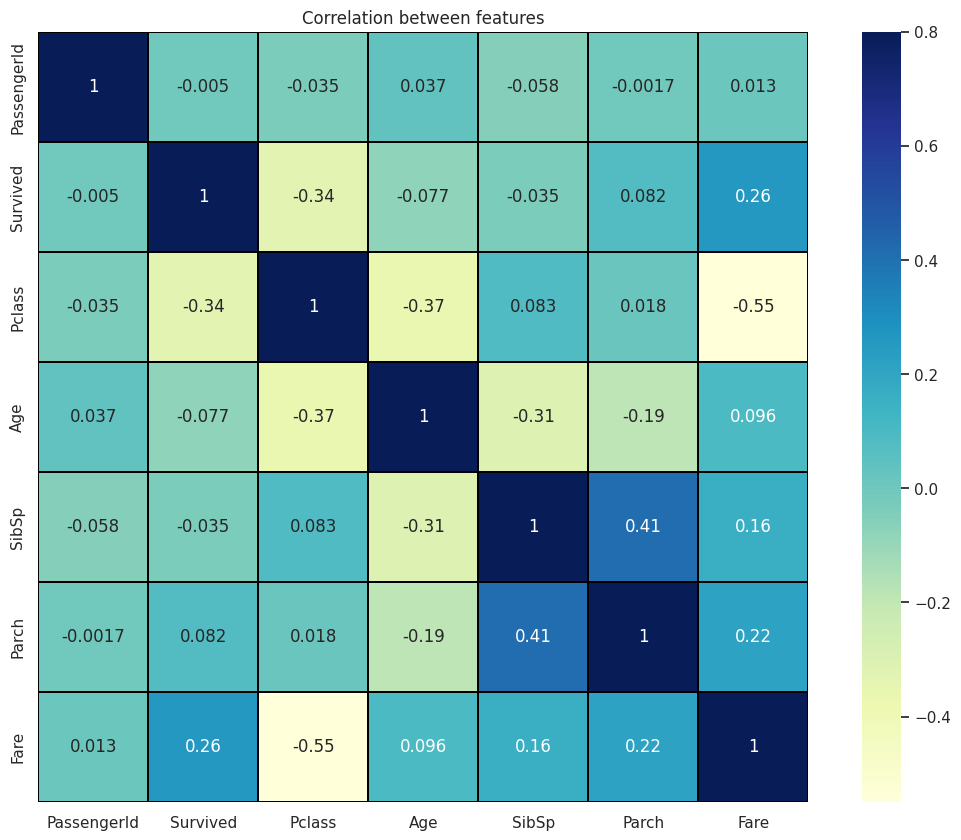

In [ ]:
corr=df_numeric.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

### Основные наблюдения:
1. **Класс обслуживания (Pclass) и выживаемость (Survived)**:
   - Существует отрицательная корреляция между классом обслуживания и выживаемостью (-0.34). Это подтверждает, что пассажиры более высокого класса (например, первого) имели больше шансов на выживание по сравнению с пассажирами низкого класса (например, третьего).

2. **Стоимость билета (Fare) и класс обслуживания (Pclass)**:
   - Корреляция между стоимостью билета и классом составляет -0.55. Это высокая отрицательная корреляция, указывающая на то, что билеты более высокого класса (например, первого) имели более высокую стоимость по сравнению с билетами третьего класса.

3. **Возраст (Age) и класс обслуживания (Pclass)**:
   - Наблюдается слабая отрицательная корреляция (-0.37) между возрастом и классом. Это может указывать на то, что пассажиры более молодого возраста чаще находились в низком классе обслуживания (третьем классе).

4. **Стоимость билета (Fare) и выживаемость (Survived)**:
   - Существует положительная корреляция (0.26) между стоимостью билета и шансами на выживание, что может означать, что пассажиры с более дорогими билетами имели более высокие шансы на спасение. Это согласуется с более высокой выживаемостью пассажиров первого класса.

5. **Количество родителей/детей на борту (Parch) и количество братьев/сестер/супругов на борту (SibSp)**:
   - Между Parch и SibSp наблюдается умеренная положительная корреляция (0.41). Это логично, так как семьи с большим количеством членов могут включать и супругов, и родителей/детей, что увеличивает оба показателя.

### Заключение:
- **Класс и стоимость билета** являются важными факторами, влияющими на выживаемость, что подтверждает социально-экономическое влияние на спасательные приоритеты.
- **Возраст и класс** показывают, что более молодые пассажиры чаще находились в третьем классе, что также может отчасти объяснять более низкие шансы на выживание среди пассажиров третьего класса.
- Семейные группы (Parch и SibSp) имеют положительную корреляцию, что отражает присутствие семей на борту и может также косвенно влиять на выживаемость (например, сложность эвакуации больших семей).

Эти данные подчеркивают значимость социально-экономических факторов в выживании пассажиров.

# Feature Engineering

Из графиков мы видели, что отсутсвие родственников сказывалось, на выживаемости

In [ ]:
df['IsAlone'] = (df['SibSp'] + df['Parch'] + 1 == 1).astype(int)

Достанем "титул", так как он тоже может оказывать влияние

In [ ]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

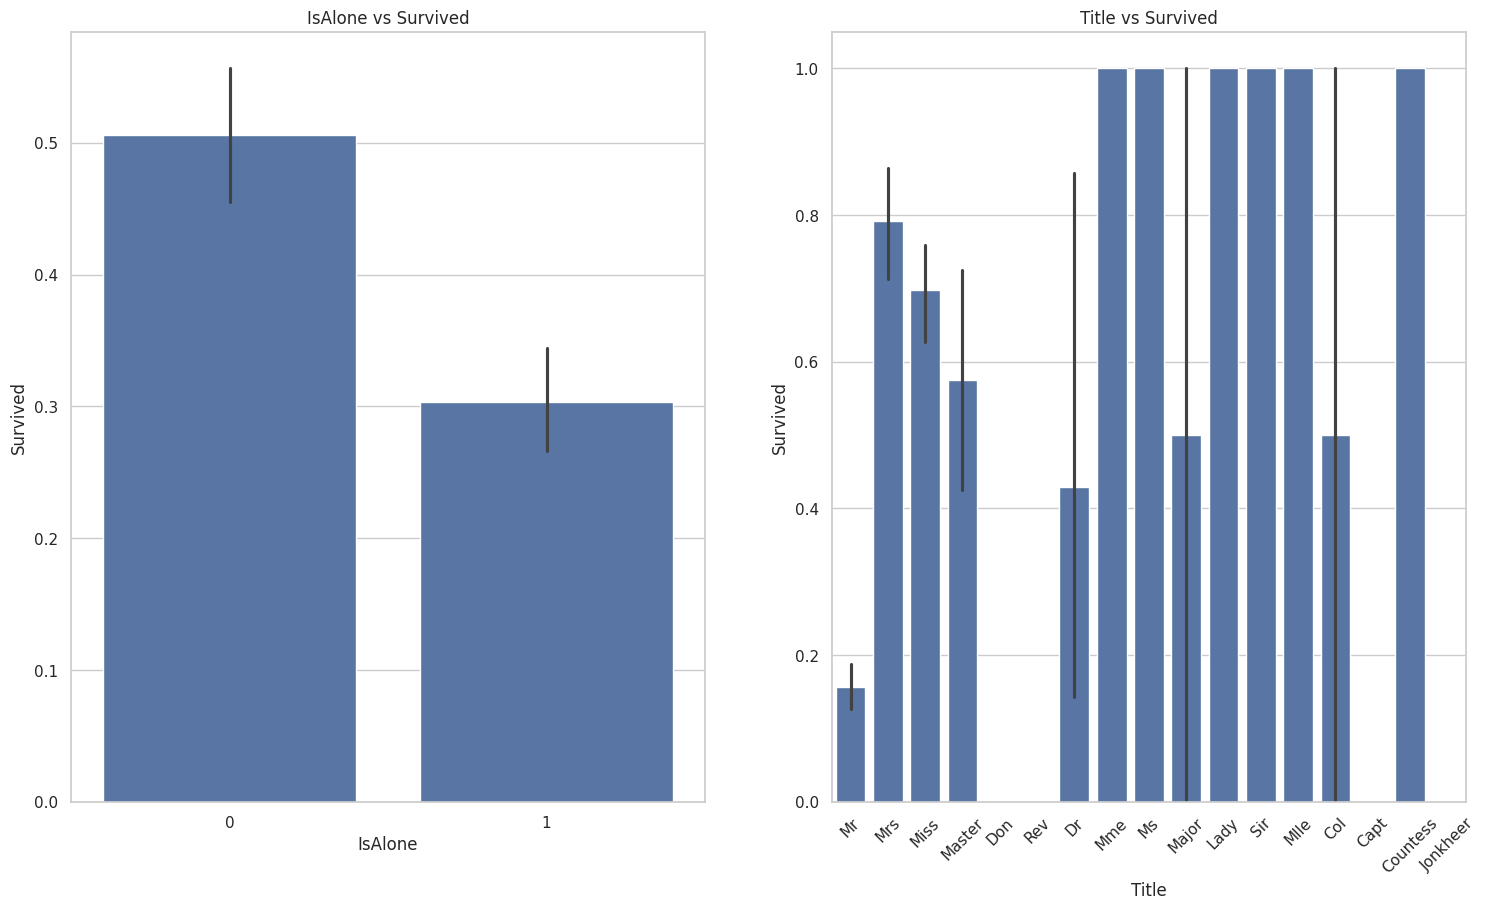

In [ ]:
# Визуализация зависимости новых признаков от `Survived`
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# FamilySize
sns.barplot(x='IsAlone', y='Survived', data=df, ax=axes[0])
axes[0].set_title('IsAlone vs Survived')
# Title
sns.barplot(x='Title', y='Survived', data=df, ax=axes[1])
axes[1].set_title('Title vs Survived')
axes[1].tick_params(axis='x', rotation=45)

### График 1: Взаимосвязь между одиночеством (IsAlone) и выживаемостью (Survived)
- Пассажиры, которые путешествовали не в одиночку (`IsAlone = 0`), имели значительно более высокие шансы на выживание, чем те, кто был один (`IsAlone = 1`).
- Это может свидетельствовать о том, что наличие рядом членов семьи или друзей во время эвакуации могло оказывать положительное влияние на шансы спасения, так как такие пассажиры могли получать поддержку и помощь от близких.

### График 2: Взаимосвязь между титулом (Title) и выживаемостью (Survived)
- Титулы, такие как "Mrs", "Miss", и "Master", имеют более высокие показатели выживаемости, что может быть связано с приоритетом спасения женщин и детей.
- Мужчины с титулом "Mr" имели значительно более низкие шансы на выживание, что согласуется с предыдущими выводами о меньших шансах выживания для мужчин по сравнению с женщинами и детьми.
- Пассажиры с титулами, указывающими на высокий социальный статус или особое положение, такими как "Countess", "Lady", и "Sir", демонстрируют высокий процент выживаемости, что может указывать на социально-экономическое влияние на спасательные приоритеты.
- Некоторые менее распространенные титулы, такие как "Capt", "Dr", и "Rev", имеют низкие показатели выживаемости, возможно, потому что эти пассажиры не попадали в приоритетные категории для спасения.

### Заключение:
- Пассажиры, путешествующие в одиночку, имели меньшие шансы на выживание, тогда как наличие рядом членов семьи или друзей положительно влияло на выживаемость.
- Титул также имел значительное влияние на шансы выживания. Женщины и дети имели более высокие шансы на спасение, в то время как мужчины с титулом "Mr" и пассажиры с низким социальным статусом сталкивались с более высокими рисками.
- Эти наблюдения подчеркивают важность социальных факторов, таких как семейное положение и социальный статус, в процессе спасения на "Титанике".

In [ ]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

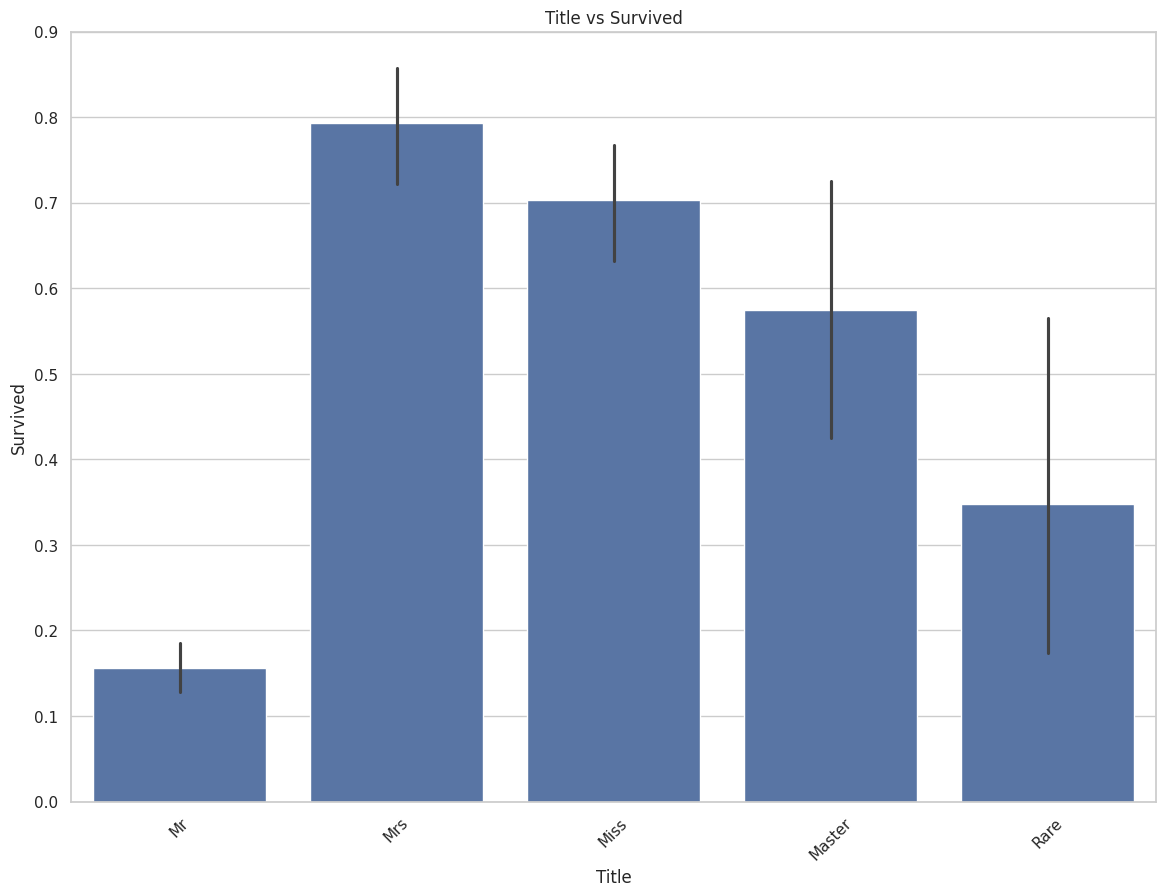

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Title vs Survived')
plt.tick_params(axis='x', rotation=45)

### Выводы по каждому титулу:
1. **Mr**:
   - Пассажиры с титулом "Mr" имеют самые низкие шансы на выживание (около 0.2). Это указывает на то, что мужчины взрослого возраста были менее приоритетной группой для спасения.

2. **Mrs**:
   - Титул "Mrs" (женщины, замужем) ассоциируется с высокой вероятностью выживания (около 0.8). Это подтверждает, что женщины, особенно замужние, имели высокий приоритет при спасении.

3. **Miss**:
   - Пассажиры с титулом "Miss" (незамужние женщины) также имели высокий шанс на выживание, хотя немного ниже, чем у "Mrs" (около 0.7). Это отражает общий приоритет спасения женщин.

4. **Master**:
   - Титул "Master", который обычно указывает на детей мужского пола, также демонстрирует высокую вероятность выживания (около 0.6). Это указывает на то, что дети, независимо от пола, имели высокие шансы на спасение.

5. **Rare**:
   - В эту категорию входят редкие титулы, такие как "Dr", "Rev", "Col" и другие. Шанс выживания пассажиров с редкими титулами ниже (около 0.3), что может свидетельствовать о том, что пассажиры с особым социальным статусом или профессиональными титулами не всегда находились в приоритетной группе для спасения.

### Общий вывод:
- Женщины (с титулами "Mrs" и "Miss") и дети (с титулом "Master") имели самые высокие шансы на выживание, что отражает социальные нормы того времени, когда приоритет спасения отдавался женщинам и детям.
- Мужчины с титулом "Mr" имели значительно более низкие шансы на выживание, что также соответствует историческим данным о крушении.
- Пассажиры с редкими титулами (категория "Rare") также имели сравнительно низкие шансы на спасение, что может быть связано с отсутствием особого приоритета для этих профессиональных и социальных категорий в спасательных мероприятиях.

## Предобработка данных

Видим умеренную обратную корреляцию между классом и стоимостью билета, что логично, так как чем дороже билет, тем выше класс

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age и Embarked можно заполнить, а Cabin лучше удалить, так как слишком много пропусков

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Кодирование категориальных данных

In [6]:
cat_fetures = ['Sex', 'Embarked', 'Title']

In [7]:
for feature in cat_fetures:
    label_encoder = LabelEncoder()
    df[feature] = label_encoder.fit_transform(df[feature])

Удаление ненужных колонок

In [8]:
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Разделение данных

Разделение на признаки и целевую переменную

In [9]:
X = df.drop('Survived', axis=1)
y = df['Survived']

Масштабирование признаков

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Преобразование в NumPy массивы для Keras

In [11]:
X = np.array(X)
y = np.array(y)

Разделение на тренировочную и тестовую выборки

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

One-hot кодирование целевой переменной

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Создание и обучение модели

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Nadam
from keras.callbacks import EarlyStopping

In [15]:
def build_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu', kernel_regularizer='l2'),
        Dropout(0.6),
        Dense(32, activation='relu', kernel_regularizer='l2'),
        Dropout(0.6),
        Dense(16, activation='relu', kernel_regularizer='l2'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Nadam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

input_dim = X_train.shape[1]
model = build_model(input_dim)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Точность на тестовых данных: {accuracy:.4f}, Потери на тестовых данных: {loss:.4f}')

Точность на тестовых данных: 0.8212, Потери на тестовых данных: 0.4838


В этом коде я создал и обучил свою первую модель нейронной сети для задачи бинарной классификации. Модель состоит из нескольких слоев (`Dense`) с функцией активации ReLU и регуляризацией `l2`, что помогает предотвратить переобучение. Я также использовал слои Dropout, чтобы дополнительно снизить риск переобучения, отключая 60% нейронов на каждом слое во время обучения. На последнем слое стоит функция активации softmax, чтобы получить вероятности для двух классов.

Обучение проводилось с использованием оптимизатора Nadam и функции потерь `binary_crossentropy`, что подходит для задачи бинарной классификации. Я также добавил раннюю остановку (`EarlyStopping`), чтобы модель прекращала обучение, если валидационные потери перестанут снижаться, что должно улучшить обобщающую способность модели.

После обучения модель была протестирована на тестовых данных, и я получил следующие результаты:
- **Точность на тестовых данных**: 0.8212
- **Потери на тестовых данных**: 0.4838

Эти метрики показывают, что модель имеет точность около 82% на тестовой выборке, что является хорошим результатом для первой попытки. Однако потери всё еще довольно высокие, что может указывать на необходимость дальнейшей настройки модели для улучшения ее качества.

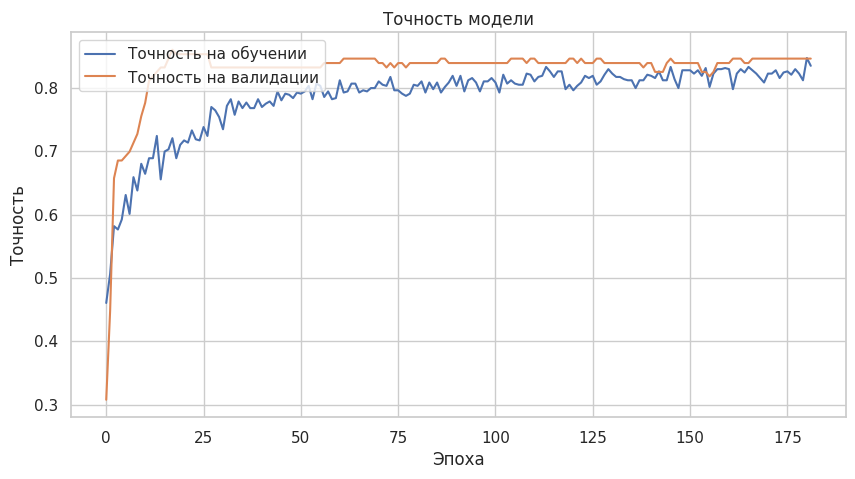

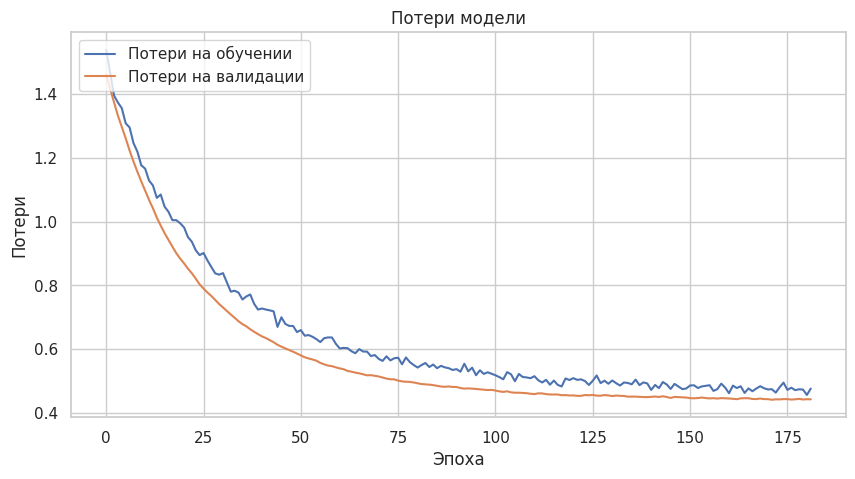

In [ ]:
# График accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='upper left')
plt.show()

# График loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Потери на обучении')
plt.plot(history.history['val_loss'], label='Потери на валидации')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(loc='upper left')
plt.show()


### Точность модели
- Видно, что точность на обучении плавно увеличивается и достигает стабильного значения примерно к 50-й эпохе.
- Точность на валидации быстро возрастает на первых 10 эпохах, а затем стабилизируется на уровне чуть выше 80%, что близко к точности на тестовых данных (0.8212).
- Отсутствие заметного расхождения между графиками обучающей и валидационной точности после 50-й эпохи указывает на то, что модель не переобучается и демонстрирует стабильное поведение.

### Потери модели
- Потери на обучающей выборке постепенно снижаются на протяжении всех эпох, указывая на постепенное улучшение модели.
- Потери на валидации также снижаются на первых 50 эпохах, затем стабилизируются на уровне около 0.5, что соответствует потерям на тестовой выборке (0.4838).
- Стабильность значений потерь на валидации говорит о том, что модель достигает своего оптимума и удерживает его, не показывая признаков переобучения.

### Общий вывод
Графики показывают, что модель обучена стабильно и не переобучается на данных. Она достигает хорошего уровня точности и потерь как на обучении, так и на валидации, что свидетельствует о её способности к обобщению. Тем не менее, дальнейшие улучшения возможны, и можно попробовать оптимизировать архитектуру модели.

In [28]:
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_dim, )))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Nadam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

Создаю 2-ю модель с использованием слоёв нормализации (BatchNormalization) и Dropout для улучшения стабильности и обобщающей способности модели.

### Ключевые особенности модели:
1. **Слои Dense**:
   - Модель состоит из нескольких слоёв (`Dense`) с активацией ReLU, которые постепенно уменьшаются по количеству нейронов (64, 32, 16).

2. **Batch Normalization**:
   - Нормализация на каждом скрытом слое стабилизирует и ускоряет обучение, уменьшая внутреннее смещение в данных и делая модель более устойчивой к изменению данных. Я использовал `momentum=0.97` для более сглаженной адаптации параметров.

3. **Dropout**:
   - Dropout слой с вероятностью 0.25 помогает предотвратить переобучение, отключая 25% нейронов во время обучения. Это способствует улучшению обобщающей способности модели.

4. **Сигмоид на выходе**:
   - На последнем слое используется активация `sigmoid` для предсказания вероятности в задаче бинарной классификации, что позволяет получить значение от 0 до 1.

5. **Компиляция**:
   - Модель компилируется с оптимизатором Nadam и функцией потерь `binary_crossentropy`, что подходит для задач бинарной классификации. В качестве метрики выбрана `accuracy`.

### Ожидаемые результаты:
Эти улучшения (Batch Normalization и Dropout) должны повысить устойчивость модели к переобучению и сделать её обучение более стабильным.

In [66]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Параметры кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Размер входного слоя

target_names = ['Died', 'Survived']

# Списки для хранения результатов каждой итерации
all_reports = []
all_confusion_matrices = []
all_accuracies = []
all_losses = []
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Проход по каждому фолду
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Построение и обучение модели
    input_dim = X_train_fold.shape[1]

    y_train_fold = to_categorical(y_train_fold)
    y_val_fold = to_categorical(y_val_fold)

    model = build_model(input_dim)
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32,
              validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Предсказания на валидационном наборе
    y_pred_fold = model.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred_fold, axis=1)
    y_true_classes = np.argmax(y_val_fold, axis=1)

    all_accuracies.append(history.history['val_accuracy'])
    all_losses.append(history.history['val_loss'])

    # Генерация отчета и матрицы ошибок
    report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)
    confusion = confusion_matrix(y_true_classes, y_pred_classes)

    # Сохранение результатов
    all_reports.append(report)
    all_confusion_matrices.append(confusion)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


В этом коде реализована кросс-валидация для модели, позволяющая оценить её производительность на различных подвыборках данных. Используется метод KFold с 5 фолдами, что помогает оценить стабильность и обобщающую способность модели.

### Основные шаги:
1. **Разбиение данных**: Данные делятся на 5 подвыборок, и для каждой из них по очереди модель обучается на 4 подвыборках, а тестируется на оставшейся.
2. **Обучение модели**: Для каждой итерации создаётся новая модель с помощью функции `build_model`, и она обучается на текущем тренировочном наборе данных. Используется ранняя остановка (`EarlyStopping`) для предотвращения переобучения.
3. **Сохранение метрик**:
   - **Точность и потери** на валидационной выборке сохраняются для анализа стабильности модели.
   - **Отчёт о классификации** (`classification_report`) и **матрица ошибок** (`confusion_matrix`) позволяют детально оценить качество модели на каждом фолде.

### Ожидаемые результаты:
Этот подход помогает оценить, насколько модель способна обобщать на новых данных и выявляет возможные слабые места, такие как склонность к ошибкам в определённых классах. По завершении кросс-валидации я усредню результаты метрик для каждого фолда, чтобы получить сводную оценку эффективности модели.

In [62]:
def make_confusion_matrix(matrix, index):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Died', 'Predicted Survived'],
                yticklabels=['Actual Died', 'Actual Survived'])
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Фактический класс')
    plt.title(f'Матрица ошибок для фолда {index}')
    plt.show()

              precision    recall  f1-score   support

        Died       0.82      0.86      0.84       105
    Survived       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



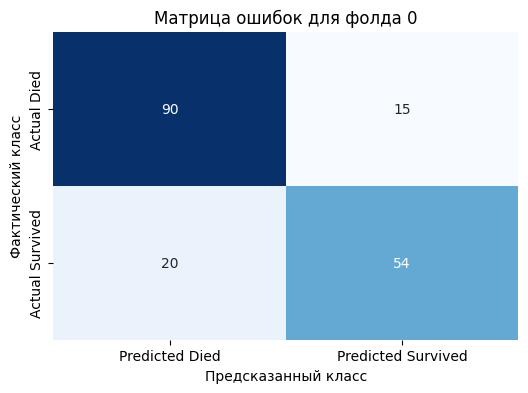

In [67]:
print(all_reports[0])
make_confusion_matrix(all_confusion_matrices[0], 0)

              precision    recall  f1-score   support

        Died       0.80      0.91      0.85       111
    Survived       0.81      0.63      0.71        67

    accuracy                           0.80       178
   macro avg       0.80      0.77      0.78       178
weighted avg       0.80      0.80      0.80       178



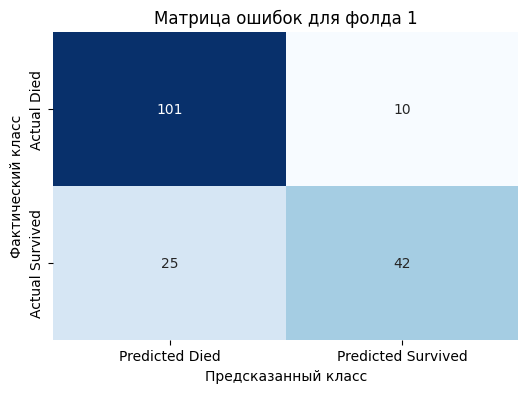

In [68]:
print(all_reports[1])
make_confusion_matrix(all_confusion_matrices[1], 1)

              precision    recall  f1-score   support

        Died       0.86      0.92      0.89       108
    Survived       0.86      0.77      0.81        70

    accuracy                           0.86       178
   macro avg       0.86      0.84      0.85       178
weighted avg       0.86      0.86      0.86       178



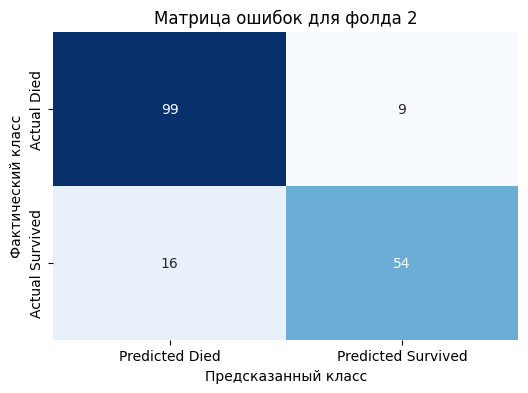

In [69]:
print(all_reports[2])
make_confusion_matrix(all_confusion_matrices[2], 2)

              precision    recall  f1-score   support

        Died       0.78      0.87      0.82       112
    Survived       0.72      0.59      0.65        66

    accuracy                           0.76       178
   macro avg       0.75      0.73      0.74       178
weighted avg       0.76      0.76      0.76       178



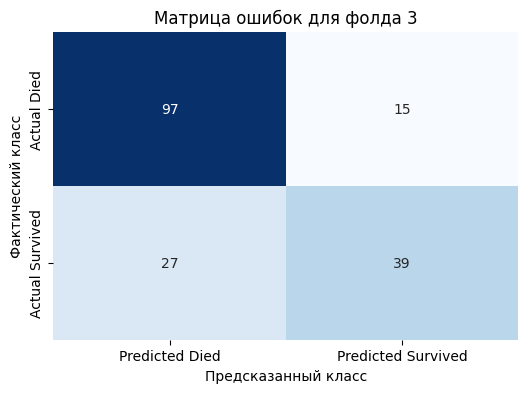

In [70]:
print(all_reports[3])
make_confusion_matrix(all_confusion_matrices[3], 3)

              precision    recall  f1-score   support

        Died       0.85      0.85      0.85       113
    Survived       0.74      0.74      0.74        65

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



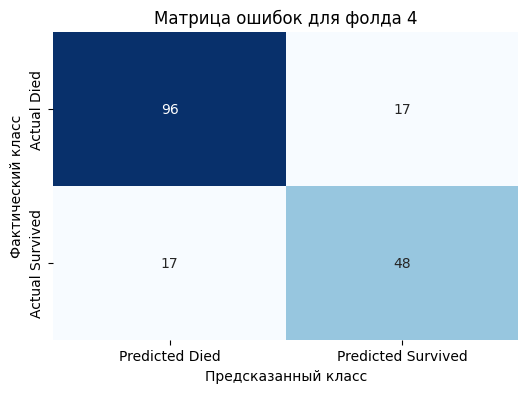

In [71]:
print(all_reports[4])
make_confusion_matrix(all_confusion_matrices[4], 4)

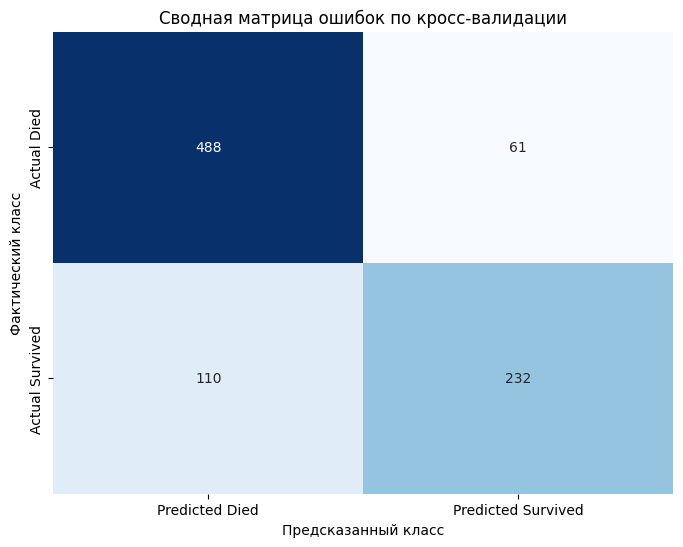

,Died,Survived,accuracy,macro avg,weighted avg
precision,0.816894,0.790910,0.808104,0.803902,0.807160
recall,0.888751,0.677483,0.808104,0.783117,0.808104
f1-score,0.851004,0.728592,0.808104,0.789798,0.804381
support,109.800000,68.400000,0.808104,178.200000,178.200000


In [65]:
# Построение итоговой матрицы ошибок
total_confusion_matrix = np.sum(all_confusion_matrices, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Died', 'Predicted Survived'],
                yticklabels=['Actual Died', 'Actual Survived'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.title('Сводная матрица ошибок по кросс-валидации')
plt.show()

# Вывод Classification Report в табличной форме
report_df = pd.DataFrame.from_dict(all_reports[0])  # Возьмем отчет из первого фолда, чтобы показать структуру
for i, report in enumerate(all_reports[1:], 2):
    report_df += pd.DataFrame.from_dict(report)  # Суммируем отчеты

report_df /= len(all_reports)  # Получаем средние значения по фолдам

from IPython.display import display

display(report_df)

Не стал писать отдельные выводы к каждому фолду, потому что там ситации примерно одинаковые.

На основе представленной сводной матрицы ошибок и отчёта о классификации можно сделать следующие выводы:

### Матрица ошибок:
- **True Positive (TP)**: Модель правильно предсказала, что человек выживет — 232 случая.
- **True Negative (TN)**: Модель правильно предсказала, что человек погибнет — 488 случаев.
- **False Positive (FP)**: Модель ошибочно предсказала, что человек выживет, хотя он погиб — 61 случай.
- **False Negative (FN)**: Модель ошибочно предсказала, что человек погибнет, хотя он выжил — 110 случаев.

### Метрики качества:
1. **Точность (accuracy)**: Общая точность модели составляет 80.8%, что является хорошим показателем для этой задачи. Это говорит о том, что модель правильно предсказывает исход для большинства пассажиров.
2. **Precision (точность по классам)**:
   - Для класса "Died" (умер) — 81.7%, что означает, что модель относительно хорошо идентифицирует людей, которые погибли.
   - Для класса "Survived" (выжил) — 79.1%, что указывает на чуть меньшую точность при предсказании выживших.
3. **Recall (полнота по классам)**:
   - Для класса "Died" — 88.9%, что говорит о том, что модель успешно охватывает большую часть пассажиров, которые действительно погибли.
   - Для класса "Survived" — 67.7%, что несколько ниже и говорит о том, что модель иногда ошибается, предсказывая, что пассажир погиб, хотя он выжил.
4. **F1-score**:
   - F1-score для класса "Died" (85.1%) выше, чем для класса "Survived" (72.9%). Это подтверждает, что модель лучше справляется с предсказанием погибших, чем выживших.

### Общий вывод:
Модель демонстрирует высокую точность и хорошо справляется с предсказанием класса "Died" (погиб), но менее успешно определяет выживших, что отражается в более низких значениях recall и F1-score для класса "Survived". Это и логично, так как присутствует несбалансированность классов и погибших примерно в 2 раза больше

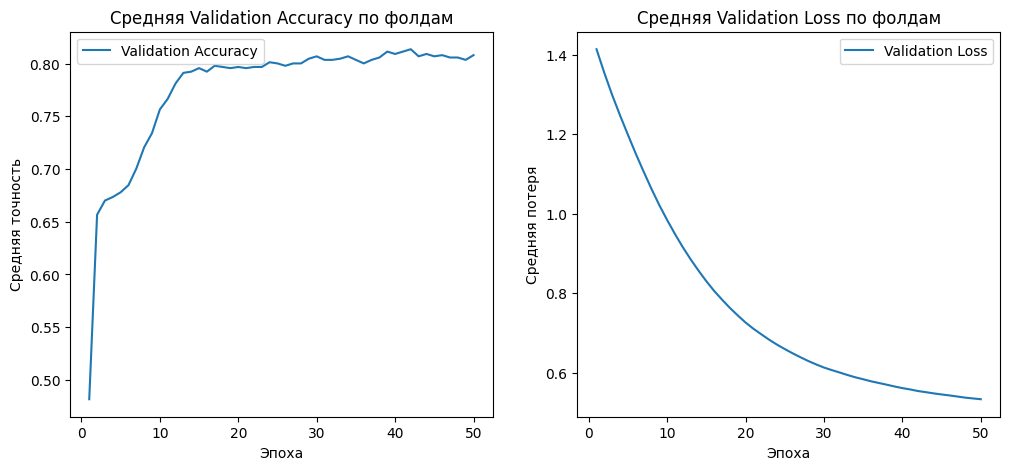

In [61]:
# Средние значения для accuracy и loss по всем фолдам
mean_accuracy = np.mean(all_accuracies, axis=0)
mean_loss = np.mean(all_losses, axis=0)

# Построение графика accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 50 + 1), mean_accuracy, label='Validation Accuracy')
plt.xlabel('Эпоха')
plt.ylabel('Средняя точность')
plt.title('Средняя Validation Accuracy по фолдам')
plt.legend()

# Построение графика loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 50 + 1), mean_loss, label='Validation Loss')
plt.xlabel('Эпоха')
plt.ylabel('Средняя потеря')
plt.title('Средняя Validation Loss по фолдам')
plt.legend()

plt.show()

На графиках отображены средние метрики точности (accuracy) и потерь (loss) на валидационных наборах по всем фолдам кросс-валидации для нашей модели.

### Анализ производительности модели
1. **Средняя точность на валидации**:
   - Точность модели стабилизируется на уровне около 80% после первых 10 эпох. Это указывает на то, что наша модель достигает хороших результатов на начальных этапах обучения, а дальнейшее обучение незначительно улучшает метрику. Это также подтверждается графиком потерь, где снижение становится менее выраженным после 30 эпох.

2. **Средняя потеря на валидации**:
   - Потери модели постепенно уменьшаются на протяжении всех эпох, что свидетельствует о её способности обучаться и лучше адаптироваться к данным. Однако после достижения определённого уровня, потери также начинают стабилизироваться.

### Ключевые выводы
Несмотря на то, что наша нейронная сеть достигает приемлемого уровня точности и потерь, она сталкивается с определёнными ограничениями в этой задаче:

1. **Ограничение данных**:
   - Нейронные сети, как правило, показывают свои преимущества на больших объемах данных. В данном случае, датасет "Титаник" сравнительно небольшой, что ограничивает возможности модели извлечь более сложные паттерны. Из-за этого нейронная сеть может быть избыточной для данной задачи, и её потенциал не раскрывается в полной мере.

2. **Сравнение с классическими моделями**:
   - Задача предсказания выживаемости на "Титанике" традиционно хорошо решается с помощью классических алгоритмов, таких как RandomForest, Gradient Boosting и других методов ансамблирования. Эти модели лучше подходят для небольших данных и, при правильной настройке гиперпараметров, могут показать более высокие метрики с меньшими затратами на вычисления.

3. **Использование сторонних данных**:
   - В "эталонных" решениях для задачи "Титаник" часто применяются внешние данные и дополнительные признаки, такие как информация о социальных и экономических аспектах пассажиров. Это позволяет существенно повысить точность модели без использования глубоких нейронных сетей.

4. **Устранение переобучения**:
   - Применение Batch Normalization и Dropout помогло модели избежать переобучения, и это положительный результат. Однако сам по себе такой подход не позволяет модели полностью компенсировать нехватку данных.

### Заключение и рекомендации
Модель нейронной сети, использованная здесь, демонстрирует стабильные результаты и хорошую способность к обобщению. Однако для задачи предсказания выживаемости на "Титанике" её эффективность ограничена из-за малого объема данных. На данном датасете более оправдано использовать классические методы машинного обучения, такие как RandomForest, поскольку они могут достичь более высокой точности с меньшими ресурсами.

Использование нейронных сетей в этой задаче, возможно, не оправдывает затрат, особенно если целью является практическое применение. В будущем можно сосредоточиться на оптимизации гиперпараметров классических моделей и использовании дополнительных признаков из сторонних данных, что, вероятно, даст лучший результат без необходимости в сложной архитектуре нейронной сети.